##import data set

In [ ]:
import pandas as pd
data= pd.read_csv("/content/NewspaperData.csv")
data.head()


,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [ ]:
data

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


#correlation

In [ ]:
data.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


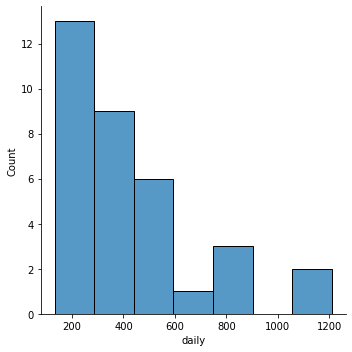

In [ ]:
import seaborn as sns 
sns.displot(data['daily'])

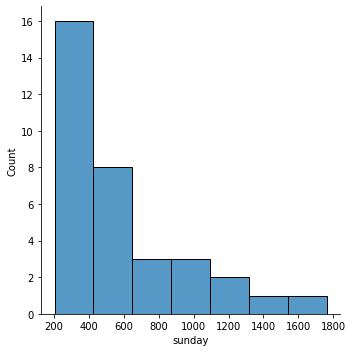

In [ ]:
sns.displot(data ['sunday'])

#fitting a linear regression model

In [ ]:
import statsmodels.formula.api as smf # model - Regression model, "Y~X", OR "Dependent_variable~Independent_Variable"
model=smf.ols("sunday~daily",data=data).fit()  # Ordinary Least Squares, y Dep. variable - sunday, then give ~ symbol and then x Ind.Variable - daily, 
                                                  # dataset - data, fit() - fit the regression line

In [ ]:
#Coefficients are B0 and B1
model.params
# Reg. Equn: Sunday = B0+B1*daily
# In output: Intercept - B0, daily - coefficient of daily i.e.B1
# Sunday = 13.83 + 1.33 * daily
# we assumed daily circulation as 200
# So Sunday = 13.83 + 1.33 * 200

Intercept    13.835630
daily         1.339715
dtype: float64

In [ ]:
sun=13.83+1.33*200
sun

279.83

In [ ]:
#R squared values - 0.92 - Good reg. equn.
(model.rsquared,model.rsquared_adj)

(0.9180596895873295, 0.9154990548869336)

In [ ]:

# model.summary() # OLS - Ordinary Least Squares

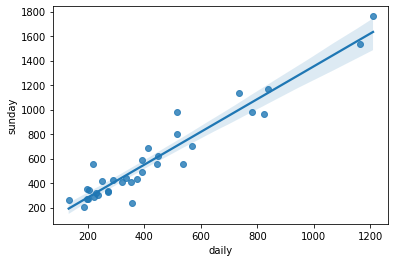

In [ ]:
sns.regplot(x="daily",y="sunday", data=data)

In [ ]:
#t and p value
print(model.tvalues, '\n', model.pvalues)
#we have estimate B0=13.8,, B1=1.33. We have t-value 0.38 and 18.93, p-value - 0.7, 6.01 is approx.= 0
#focus on B1. B1 is slope. Define H0 and H1.

Intercept     0.386427
daily        18.934840
dtype: float64 
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [ ]:
#1100 manual calculation
(1.3*1100)+13.835630

1443.83563

#predict for new data

In [ ]:
#Predict for 200 and 300 daily circulation
newdata=pd.Series([200,300]) # x value is (daily circulation) 200 at one branch and 300 at another branch

In [ ]:
newdata

0    200
1    300
dtype: int64

In [ ]:
data_pred=pd.DataFrame(newdata,columns=['daily'])

In [ ]:
data_pred

,daily
0,200
1,300


In [ ]:
model.predict(data_pred) # model - regression model

0    281.778581
1    415.750057
dtype: float64